# Data Merge

#### 0. Load Required Package & Data

In [2]:
import pandas as pd
import numpy as np
import mpu
import json
import re  
pd.set_option('display.max_columns', None)
house = pd.read_csv('../data/house_combined.csv')
bus = pd.read_csv('../data/bus_stops_file.csv')
train = pd.read_csv('../data/train_stops_file.csv')
tram = pd.read_csv('../data/tram_stops_file.csv')
vline = pd.read_csv('../data/vline_stops_file.csv')
population = pd.read_excel('../data/Population.xlsx')
income = pd.read_excel('../data/Income.xlsx',sheet_name="Forecasted Income")
male = pd.read_excel('../data/Sex & Age by Year.xlsx', sheet_name="Male")
female = pd.read_excel('../data/Sex & Age by Year.xlsx', sheet_name="Female")
school = pd.read_csv('../data/school.csv',sep=",", encoding='cp1252')
hospital = pd.read_csv('../data/hospital_csv',sep=",", encoding='cp1252')
sc = pd.read_csv('../data/shopping_with_postcode.csv')
data_2019 = pd.read_csv('../data/2019_data.csv',sep=",", encoding='cp1252')
data_2020 = pd.read_csv('../data/2020_data.csv',sep=",", encoding='cp1252')
data_2021 = pd.read_csv('../data/2021_data.csv',sep=",", encoding='cp1252')
data_2022 = pd.read_csv('../data/2022_data.csv',sep=",", encoding='cp1252')


#### 1. Properties
Extract needed columns from house_combined.

In [3]:

need_col = [
    "Unnamed: 0",
    "propertyTypes",
    "bathrooms",
    "bedrooms",
    "carspaces",
    "dateUpdated",
    "dateListed",
    "geoLocation",
    "landAreaSqm",
    "postcode",
    "surburb",
    'year', 
    'month',
    'price', 
    'bond',
    'rent'
]

init_house = house[need_col]
init_house.rename(columns={"Unnamed: 0":"index"}, inplace=True)
init_house["geoLocation"] = init_house["geoLocation"].apply(lambda x: re.sub('\'','\"', str(x)))
init_house = init_house[init_house["geoLocation"] != 'nan']
init_house['longitude'] = init_house['geoLocation'].apply(lambda d: json.loads(d)["longitude"])
init_house['latitude'] = init_house['geoLocation'].apply(lambda d: json.loads(d)["latitude"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_25536\2580550232.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_house.rename(columns={"Unnamed: 0":"index"}, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_25536\2580550232.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_house["geoLocation"] = init_house["geoLocation"].apply(lambda x: re.sub('\'','\"', str(x)))


#### 2. Transportation

##### 2.1 Bus

In [4]:
# Bus
merge_bus = pd.merge(init_house,bus,how='left',on='postcode')
merge_bus["tmp"] = np.sin(merge_bus["stop_latitude"] - merge_bus["latitude"] / 2)**2 + np.cos(merge_bus["latitude"]) * np.cos(merge_bus["stop_latitude"]) * np.sin(merge_bus["stop_longitude"] - merge_bus["longitude"] / 2)**2
merge_bus["bus_stop_distance"] = 2 * np.arctan2(np.sqrt(merge_bus["tmp"]), np.sqrt(1 - merge_bus["tmp"]))


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
bus_stop_min = pd.DataFrame(merge_bus.groupby(["index",'postcode'])["bus_stop_distance"].min())
# bus_stop_min
bus_stop_count = pd.DataFrame(merge_bus.groupby(["index",'postcode'])["bus_stop_distance"].count())
# bus_stop_count
init_house = pd.merge(init_house,bus_stop_min,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house = pd.merge(init_house,bus_stop_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house.rename(columns={"bus_stop_distance_x":"distance of the closest bus stop","bus_stop_distance_y":"count of bus stop"}, inplace=True)
# init_house

##### 2.2 Train

In [6]:
merge_train = pd.merge(init_house,train,how='left',on='postcode')
merge_train["tmp"] = np.sin(merge_train["stop_latitude"] - merge_train["latitude"] / 2)**2 + np.cos(merge_train["latitude"]) * np.cos(merge_train["stop_latitude"]) * np.sin(merge_train["stop_longitude"] - merge_bus["longitude"] / 2)**2
merge_train["train_stop_distance"] = 2 * np.arctan2(np.sqrt(merge_train["tmp"]), np.sqrt(1 - merge_train["tmp"]))
train_stop_min = pd.DataFrame(merge_train.groupby(["index",'postcode'])["train_stop_distance"].min())
train_stop_count = pd.DataFrame(merge_train.groupby(["index",'postcode'])["train_stop_distance"].count())
init_house = pd.merge(init_house,train_stop_min,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house = pd.merge(init_house,train_stop_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house.rename(columns={"train_stop_distance_x":"distance of the closest train stop","train_stop_distance_y":"count of train stop"}, inplace=True)


##### 2.3 Tram

In [7]:
merge_tram = pd.merge(init_house,tram,how='left',on='postcode')
merge_tram["tmp"] = np.sin(merge_tram["stop_latitude"] - merge_tram["latitude"] / 2)**2 + np.cos(merge_tram["latitude"]) * np.cos(merge_tram["stop_latitude"]) * np.sin(merge_tram["stop_longitude"] - merge_bus["longitude"] / 2)**2
merge_tram["tram_stop_distance"] = 2 * np.arctan2(np.sqrt(merge_tram["tmp"]), np.sqrt(1 - merge_tram["tmp"]))
tram_stop_min = pd.DataFrame(merge_tram.groupby(["index",'postcode'])["tram_stop_distance"].min())
tram_stop_count = pd.DataFrame(merge_tram.groupby(["index",'postcode'])["tram_stop_distance"].count())
init_house = pd.merge(init_house,tram_stop_min,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house = pd.merge(init_house,tram_stop_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house.rename(columns={"tram_stop_distance_x":"distance of the closest tram stop","tram_stop_distance_y":"count of tram stop"}, inplace=True)

##### 2.4 Vline

In [8]:
merge_vline = pd.merge(init_house,vline,how='left',on='postcode')
merge_vline["tmp"] = np.sin(merge_vline["stop_latitude"] - merge_vline["latitude"] / 2)**2 + np.cos(merge_vline["latitude"]) * np.cos(merge_vline["stop_latitude"]) * np.sin(merge_vline["stop_longitude"] - merge_vline["longitude"] / 2)**2
merge_vline["vline_stop_distance"] = 2 * np.arctan2(np.sqrt(merge_vline["tmp"]), np.sqrt(1 - merge_vline["tmp"]))
vline_stop_min = pd.DataFrame(merge_vline.groupby(["index",'postcode'])["vline_stop_distance"].min())
vline_stop_count = pd.DataFrame(merge_vline.groupby(["index",'postcode'])["vline_stop_distance"].count())
init_house = pd.merge(init_house,vline_stop_min,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house = pd.merge(init_house,vline_stop_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house.rename(columns={"vline_stop_distance_x":"distance of the closest vline stop","vline_stop_distance_y":"count of vline stop"}, inplace=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### 3. Facilities

##### 3.1 School

In [9]:
merge_school = pd.merge(init_house,school,how='left',left_on='postcode',right_on="Address_Postcode")
merge_school["tmp"] = np.sin(merge_school["Y"] - merge_school["latitude"] / 2)**2 + np.cos(merge_school["latitude"]) * np.cos(merge_school["Y"]) * np.sin(merge_school["X"] - merge_vline["longitude"] / 2)**2
merge_school["school_distance"] = 2 * np.arctan2(np.sqrt(merge_school["tmp"]), np.sqrt(1 - merge_school["tmp"]))
school_stop_min = pd.DataFrame(merge_school.groupby(["index",'Address_Postcode'])["school_distance"].min())
school_stop_count = pd.DataFrame(merge_school.groupby(["index",'Address_Postcode'])["school_distance"].count())
init_house = pd.merge(init_house,school_stop_min,how='left',left_on=['index','postcode'],right_on=['index','Address_Postcode'])
init_house = pd.merge(init_house,school_stop_count,how='left',left_on=['index','postcode'],right_on=['index','Address_Postcode'])
init_house.rename(columns={"school_distance_x":"distance of the closest school","school_distance_y":"count of school"}, inplace=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### 3.2 Hospital

In [10]:
merge_hospital = pd.merge(init_house,hospital,how='left',on='postcode')
merge_hospital
hospital_count = pd.DataFrame(merge_hospital.groupby(["index",'postcode'])["name"].count())
hospital_count
init_house = pd.merge(init_house,hospital_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house.rename(columns={"name":"count of hospital"}, inplace=True)

##### 3.3 Shopping Center/Malls

In [11]:
# get lat & lon from shopping center data file
a = sc['Location'].str.split(",",n = 1, expand = True)
sc['stop_longitude']=a[1]
b = a[0].str.split(":",n = 1, expand = True)
sc['stop_latitude']=b[1]


In [12]:
# update data type for lat and long extracted
sc = sc.astype({'stop_longitude': 'float'})
sc = sc.astype({'stop_latitude': 'float'})
sc.dtypes

Unnamed: 0          int64
Name               object
Suburb             object
Location           object
postcode            int64
stop_longitude    float64
stop_latitude     float64
dtype: object

In [13]:
merge_sc = pd.merge(init_house, sc, how='left',on='postcode')
merge_sc
merge_sc["tmp"] = np.sin(merge_sc["stop_latitude"] - merge_sc["latitude"] / 2)**2 + np.cos(merge_sc["latitude"]) * np.cos(merge_sc["stop_latitude"]) * np.sin(merge_sc["stop_longitude"] - merge_vline["longitude"] / 2)**2
merge_sc["sc_distance"] = 2 * np.arctan2(np.sqrt(merge_sc["tmp"]), np.sqrt(1 - merge_sc["tmp"]))
sc_stop_min = pd.DataFrame(merge_sc.groupby(["index",'postcode'])["sc_distance"].min())
sc_stop_count = pd.DataFrame(merge_sc.groupby(["index",'postcode'])["sc_distance"].count())
init_house = pd.merge(init_house,sc_stop_min,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house = pd.merge(init_house,sc_stop_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house.rename(columns={"sc_distance_x":"distance to the closest shopping mall","sc_distance_y":"count of shopping mall"}, inplace=True)
# init_house


In [14]:
merge_sc
merge_sc[merge_sc["index"]==114449]

,index,propertyTypes,bathrooms,bedrooms,carspaces,dateUpdated,dateListed,geoLocation,landAreaSqm,postcode,surburb,year,month,price,bond,rent,longitude,latitude,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,Unnamed: 0,Name,Suburb,Location,stop_longitude,stop_latitude,tmp,sc_distance
396335,114449,['apartmentUnitFlat'],2.0,2.0,0.0,2022-08-02T00:16:50.887Z,2022-07-29T10:40:25Z,"{""latitude"": -37.8093086, ""longitude"": 144.959...",NaN,3000,melbourne,2022,8,$550 pw,NaN,550.0,144.959739,-37.809309,0.450907,19,NaN,0,0.727245,23,0.448499,1,NaN,0.0,4,0.0,206 BOURKE STREET Victoria,Melbourne,"GPS: -37.812733,144.966947",144.966947,-37.812733,NaN,NaN
396336,114449,['apartmentUnitFlat'],2.0,2.0,0.0,2022-08-02T00:16:50.887Z,2022-07-29T10:40:25Z,"{""latitude"": -37.8093086, ""longitude"": 144.959...",NaN,3000,melbourne,2022,8,$550 pw,NaN,550.0,144.959739,-37.809309,0.450907,19,NaN,0,0.727245,23,0.448499,1,NaN,0.0,4,2.0,ALTONA GATE SHOPPING CENTRE Victoria,Melbourne,"GPS: -37.828989,144.84627",144.846270,-37.828989,NaN,NaN
396337,114449,['apartmentUnitFlat'],2.0,2.0,0.0,2022-08-02T00:16:50.887Z,2022-07-29T10:40:25Z,"{""latitude"": -37.8093086, ""longitude"": 144.959...",NaN,3000,melbourne,2022,8,$550 pw,NaN,550.0,144.959739,-37.809309,0.450907,19,NaN,0,0.727245,23,0.448499,1,NaN,0.0,4,14.0,BOURKE STREET MALL Victoria,Melbourne,"GPS: -37.813538,144.964386",144.964386,-37.813538,NaN,NaN
396338,114449,['apartmentUnitFlat'],2.0,2.0,0.0,2022-08-02T00:16:50.887Z,2022-07-29T10:40:25Z,"{""latitude"": -37.8093086, ""longitude"": 144.959...",NaN,3000,melbourne,2022,8,$550 pw,NaN,550.0,144.959739,-37.809309,0.450907,19,NaN,0,0.727245,23,0.448499,1,NaN,0.0,4,25.0,CAMPBELLFIELD PLAZA Victoria,Melbourne,"GPS: -37.689343,144.960737",144.960737,-37.689343,NaN,NaN
396339,114449,['apartmentUnitFlat'],2.0,2.0,0.0,2022-08-02T00:16:50.887Z,2022-07-29T10:40:25Z,"{""latitude"": -37.8093086, ""longitude"": 144.959...",NaN,3000,melbourne,2022,8,$550 pw,NaN,550.0,144.959739,-37.809309,0.450907,19,NaN,0,0.727245,23,0.448499,1,NaN,0.0,4,38.0,COLLINS PLACE Victoria,Melbourne,"GPS: -37.814312,144.97268",144.972680,-37.814312,NaN,NaN
396340,114449,['apartmentUnitFlat'],2.0,2.0,0.0,2022-08-02T00:16:50.887Z,2022-07-29T10:40:25Z,"{""latitude"": -37.8093086, ""longitude"": 144.959...",NaN,3000,melbourne,2022,8,$550 pw,NaN,550.0,144.959739,-37.809309,0.450907,19,NaN,0,0.727245,23,0.448499,1,NaN,0.0,4,39.0,COLLINS234 BOUTIQUE PLACE Victoria,Melbourne,"GPS: -37.815545,144.965749",144.965749,-37.815545,NaN,NaN
396341,114449,['apartmentUnitFlat'],2.0,2.0,0.0,2022-08-02T00:16:50.887Z,2022-07-29T10:40:25Z,"{""latitude"": -37.8093086, ""longitude"": 144.959...",NaN,3000,melbourne,2022,8,$550 pw,NaN,550.0,144.959739,-37.809309,0.450907,19,NaN,0,0.727245,23,0.448499,1,NaN,0.0,4,58.0,EMPORIUM MELBOURNE Victoria,Melbourne,"GPS: -37.812517,144.963555",144.963555,-37.812517,NaN,NaN
396342,114449,['apartmentUnitFlat'],2.0,2.0,0.0,2022-08-02T00:16:50.887Z,2022-07-29T10:40:25Z,"{""latitude"": -37.8093086, ""longitude"": 144.959...",NaN,3000,melbourne,2022,8,$550 pw,NaN,550.0,144.959739,-37.809309,0.450907,19,NaN,0,0.727245,23,0.448499,1,NaN,0.0,4,61.0,FEDERATION SQUARE (FED SQUARE) Victoria,Melbourne,"GPS: -37.81797,144.969024",144.969024,-37.817970,NaN,NaN
396343,114449,['apartmentUnitFlat'],2.0,2.0,0.0,2022-08-02T00:16:50.887Z,2022-07-29T10:40:25Z,"{""latitude"": -37.8093086, ""longitude"": 144.959...",NaN,3000,melbourne,2022,8,$550 pw,NaN,550.0,144.959739,-37.809309,0.450907,19,NaN,0,0.727245,23,0.448499,1,NaN,0.0,4,66.0,GALLERIA MELBOURNE Victoria,Melbourne,"GPS: -37.814824,144.962743",144.962743,-37.814824,NaN,NaN
396344,114449,['apartmentUnitFlat'],2.0,2.0,0.0,2022-08-02T00:16:50.887Z,2022-07-29T10:40:25Z,"{""latitude"": -37.8093086, ""longitude"": 144.959

In [15]:
init_house[init_house["postcode"]==3000]

,index,propertyTypes,bathrooms,bedrooms,carspaces,dateUpdated,dateListed,geoLocation,landAreaSqm,postcode,surburb,year,month,price,bond,rent,longitude,latitude,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,count of hospital,distance to the closest shopping mall,count of shopping mall
90,90,['apartmentUnitFlat'],1.0,1.0,0.0,2019-01-08T06:47:15.953Z,2019-01-03T00:32:26Z,"{""latitude"": -37.8181709, ""longitude"": 144.964...",NaN,3000,melbourne,2019,1,$400.00 per week,NaN,400.0,144.964354,-37.818171,0.443720,19,NaN,0,0.467878,23,0.441336,1,0.455627,4.0,4,0.271425,26
1752,1752,['apartmentUnitFlat'],1.0,1.0,1.0,2020-03-03T04:06:07.627Z,2020-02-25T05:20:07Z,"{""latitude"": -37.8204251, ""longitude"": 144.968...",NaN,3000,melbourne,2020,3,475.0,2550.0,NaN,144.968945,-37.820425,0.438642,19,NaN,0,0.456706,23,0.436261,1,0.383381,4.0,4,0.262054,26
1960,1960,['apartmentUnitFlat'],1.0,1.0,1.0,2021-02-08T23:52:24.94Z,2021-01-25T01:53:00Z,"{""latitude"": -37.8110844, ""longitude"": 144.971...",NaN,3000,melbourne,2021,2,400.0,2000.0,NaN,144.971466,-37.811084,0.439175,19,NaN,0,0.463099,23,0.436762,1,0.366230,4.0,4,0.266700,26
2088,2088,['apartmentUnitFlat'],1.0,2.0,0.0,2021-11-29T00:28:31.043Z,2021-11-15T05:34:06Z,"{""latitude"": -37.8156715, ""longitude"": 144.952...",NaN,3000,melbourne,2021,11,350.0,1521.0,NaN,144.952974,-37.815672,0.455368,19,NaN,0,0.468641,23,0.452986,1,0.378469,4.0,4,0.246024,26
2118,2118,['apartmentUnitFlat'],1.0,1.0,1.0,2022-02-10T23:26:49.223Z,2022-01-12T00:21:12Z,"{""latitude"": -37.8148884, ""longitude"": 144.954...",NaN,3000,melbourne,2022,2,400.0,1738.0,NaN,144.954228,-37.814888,0.454409,19,NaN,0,0.467752,23,0.452023,1,0.381802,4.0,4,0.271739,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111173,112163,['apartmentUnitFlat'],1.0,2.0,0.0,2022-05-21T11:04:12.18Z,2022-05-15T04:14:28Z,"{""latitude"": -37.8201858, ""longitude"": 144.956...",NaN,3000,melbourne,2022,5,"$550 pw, fully furnished with stunning views",NaN,550.0,144.956463,-37.820186,0.450662,19,NaN,0,0.623240,23,0.448291,1,NaN,0.0,4,NaN,0
111175,112165,['apartmentUnitFlat'],1.0,1.0,0.0,2022-06-30T00:49:02.67Z,2022-05-26T06:20:55Z,"{""latitude"": -37.817664, ""longitude"": 144.957957}",NaN,3000,melbourne,2022,6,$360,NaN,360.0,144.957957,-37.817664,0.449993,19,NaN,0,0.623835,23,0.447613,1,NaN,0.0,4,NaN,0
111177,112167,['apartmentUnitFlat'],1.0,1.0,0.0,2022-06-23T05:19:02.9Z,2022-06-14T05:39:17Z,"{""latitude"": -37.817664, ""longitude"": 144.957957}",NaN,3000,melbourne,2022,6,$360 pw incl utilities and furnished,NaN,360.0,144.957957,-37.817664,0.449993,19,NaN,0,0.623835,23,0.447613,1,NaN,0.0,4,NaN,0
113130,114391,['apartmentUnitFlat'],2.0,2.0,1.0,2020-11-18T04:38:19.027Z,2020-11-03T11:41:05Z,"{""latitude"": -37.811464, ""longitude"": 144.9717...",NaN,3000,melbourne,2020,11,$580 per week,NaN,580.0,144.971724,-37.811464,0.438807,19,NaN,0,0.420867,23,0.436394,1,NaN,0.0,4,NaN,0


<AxesSubplot:>

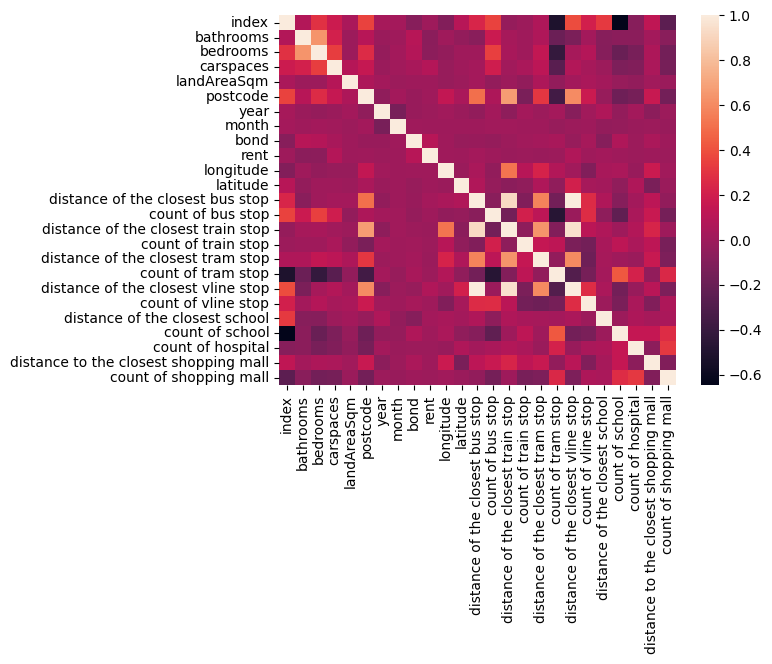

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.subplots()
# ax = plt.axes()
corr = init_house.corr()
sns.heatmap(corr)

In [17]:
# Save merged data table to curated folder
# init_house.to_csv("../data/curated/init_house.csv")

#### 4. Population, income and Sex

##### 4.1 Population

In [18]:
population = pd.read_excel('../data/Population.xlsx', sheet_name="Pop", header=[0,1])
population

Unnamed: 0_level_0   Unnamed: 1_level_0 Population                 \
              SA2 code             SA2 name        2019   2020   2021   
0            201011001            Alfredton       14408  15472  16823   
1            201011002             Ballarat       12311  12183  12076   
2            201011005            Buninyong        7452   7369   7232   
3            201011006            Delacombe        8876   9736  10640   
4            201011007        Smythes Creek        4109   4148   4213   
..                 ...                  ...         ...    ...    ...   
517          217031476                Otway        3797   3905   3978   
518          217041477         Moyne - East        6790   6873   6989   
519          217041478         Moyne - West        9833   9842   9963   
520          217041479  Warrnambool - North       22157  22379  22462   
521          217041480  Warrnambool - South       13247  13323  13292   

                  Population Increase                                
             2022                2019      2020      2021      2022  
0    18044.196846            0.065680  0.073848  0.087319  0.072591  
1    12031.700652            0.006047 -0.010397 -0.008783 -0.003668  
2     7216.773205            0.005261 -0.011138 -0.018591 -0.002105  
3    11506.950550            0.085882  0.096890  0.092851  0.081480  
4     4259.126909            0.017079  0.009491  0.015670  0.010949  
..            ...                 ...       ...       ...       ...  
517   4068.251485            0.024278  0.028444  0.018694  0.022688  
518   7046.501525            0.007269  0.012224  0.016878  0.008227  
519  10036.675409            0.006139  0.000915  0.012294  0.007395  
520  22671.843739            0.010167  0.010019  0.003709  0.009342  
521  13315.972701            0.002497  0.005737 -0.002327  0.001804  

[522 rows x 10 columns]

##### 4.2 Income

In [19]:
income = pd.read_excel('../data/Income.xlsx',sheet_name="Forecasted Income", header=[0,1])
income

Unnamed: 0_level_0   Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   SA2             SA2 NAME           Postcode   
0            201011001            Alfredton             3350.0   
1            201011002             Ballarat             3350.0   
2            201011003     Ballarat - North             3350.0   
3            201011004     Ballarat - South             3350.0   
4            201011005            Buninyong             3350.0   
..                 ...                  ...                ...   
457          217031476                Otway                NaN   
458          217041477         Moyne - East                NaN   
459          217041478         Moyne - West                NaN   
460          217041479  Warrnambool - North                NaN   
461          217041480  Warrnambool - South                NaN   

    Earners (persons)                                            \
                 2019          2020          2021          2022   
0         8503.447540   9019.555013   9567.571661  10148.885100   
1         7673.610510   7743.676448   7813.745816   7813.745816   
2        13887.614446  14253.732963  14617.249150  14617.249150   
3        13091.389530  13514.038425  13949.221083  13949.221083   
4         4322.973567   4407.512769   4483.031429   4483.031429   
..                ...           ...           ...           ...   
457       2395.620188   2444.316676   2477.970211   2477.970211   
458       4130.790588   4208.920238   4295.801621   4295.801621   
459       5904.175034   5982.515142   6039.823554   6039.823554   
460      13412.087251  13692.824973  13954.601692  13954.601692   
461       8215.899526   8382.930428   8587.396223   8587.396223   

    Median age of earners (years)                                   \
                             2019       2020       2021       2022   
0                       42.000000  42.000000  42.000000  42.000000   
1                       47.516546  47.744301  48.030360  48.390075   
2                       43.000000  43.000000  43.000000  43.000000   
3                       40.006410  40.072527  40.155309  40.259000   
4                       46.255556  46.657079  47.163341  47.541016   
..                            ...        ...        ...        ...   
457                     50.754808  50.617550  50.446442  50.233280   
458                     46.000000  46.000000  46.000000  46.000000   
459                     48.255319  48.399700  48.580716  48.807833   
460                     43.000000  43.000000  43.000000  43.000000   
461                     44.005814  44.071593  44.153940  44.257065   

          Sum ($)                                              Median ($)  \
             2019          2020          2021          2022          2019   
0    5.581284e+08  6.112807e+08  6.684159e+08  7.295697e+08  55374.162543   
1    6.203439e+08  6.428705e+08  6.724473e+08  7.019395e+08  55244.566537   
2    8.662905e+08  9.192677e+08  9.765977e+08  1.027101e+09  52249.545142   
3    6.834107e+08  7.275825e+08  7.741941e+08  8.241449e+08  47167.675189   
4    2.794734e+08  2.924104e+08  3.049772e+08  3.179211e+08  53825.456103   
..            ...           ...           ...           ...           ...   
457  1.150772e+08  1.211531e+08  1.263859e+08  1.330869e+08  37575.531366   
458  2.377618e+08  2.549300e+08  2.743324e+08  2.969008e+08  47521.300045   
459  3.397270e+08  3.560742e+08  3.729009e+08  3.937043e+08  46691.598987   
460  7.745275e+08  8.181133e+08  8.651454e+08  8.902444e+08  50549.583032   
461  4.956771e+08  5.276291e+08  5.637298e+08  6.053580e+08  48760.212040   

                                                   Mean ($)                \
             2020          2021          2022          2019          2020   
0    56981.756185  58628.439829  60284.180114  65636.394852  67773.311518   
1    56765.110158  58475.016103  60293.138457  80837.265352  83014.858813   
2    53999.918073  56041.662605  57892.944588  62370

##### 4.3 Sex Ratio

In [20]:
sex_ratio = pd.read_excel('../data/Sex & Age by Year.xlsx', sheet_name="Ratio", header=[0,1])
# sex_ratio.columns
sex_ratio


Unnamed: 0_level_0   Male                             Female         \
                   SA2   2019   2020   2021          2022   2019   2020   
0            201011001   7077   7590   8238   8827.102822   7331   7882   
1            201011002   5874   5780   5695   5663.004769   6437   6403   
2            201011003  11666  11689  11703  11785.855145  12569  12610   
3            201011004  12257  12231  12102  12164.379627  13149  13164   
4            201011005   3835   3737   3587   3561.736818   3617   3632   
..                 ...    ...    ...    ...           ...    ...    ...   
457          217031476   1925   1980   2021   2070.207617   1872   1925   
458          217041477   3452   3477   3505   3518.778436   3338   3396   
459          217041478   4850   4845   4888   4911.974987   4983   4997   
460          217041479  10746  10835  10859  10948.631716  11411  11544   
461          217041480   6407   6448   6426   6438.908610   6840   6875   

                         Person                             Male Ratio  \
      2021          2022   2019   2020   2021          2022       2019   
0     8585   9217.148629  14408  15472  16823  18044.196846   0.491185   
1     6381   6368.892049  12311  12183  12076  12031.700652   0.477134   
2    12645  12727.455494  24235  24299  24348  24513.296862   0.481370   
3    13167  13230.191627  25406  25395  25269  25394.428412   0.482445   
4     3645   3656.101969   7452   7369   7232   7216.773205   0.514627   
..     ...           ...    ...    ...    ...           ...        ...   
457   1957   1998.078446   3797   3905   3978   4068.251485   0.506979   
458   3484   3528.146548   6790   6873   6989   7046.501525   0.508395   
459   5075   5124.881849   9833   9842   9963  10036.675409   0.493237   
460  11603  11723.290235  22157  22379  22462  22671.843739   0.484993   
461   6866   6877.068708  13247  13323  13292  13315.972701   0.483657   

                                  Female Ratio                                
         2020      2021      2022         2019      2020      2021      2022  
0    0.490564  0.489687  0.489193     0.508815  0.509436  0.510313  0.510810  
1    0.474432  0.471597  0.470674     0.522866  0.525568  0.528403  0.529343  
2    0.481049  0.480655  0.480794     0.518630  0.518951  0.519345  0.519206  
3    0.481630  0.478927  0.479018     0.517555  0.518370  0.521073  0.520988  
4    0.507124  0.495990  0.493536     0.485373  0.492876  0.504010  0.506612  
..        ...       ...       ...          ...       ...       ...       ...  
457  0.507042  0.508044  0.508869     0.493021  0.492958  0.491956  0.491139  
458  0.505893  0.501502  0.499365     0.491605  0.494107  0.498498  0.500695  
459  0.492278  0.490615  0.489403     0.506763  0.507722  0.509385  0.510615  
460  0.484159  0.483439  0.482918     0.515007  0.515841  0.516561  0.517086  
461  0.483975  0.483449  0.483548     0.516343  0.516025  0.516551  0.516453  

[462 rows x 21 columns]

In [25]:
merge_data = population.merge(income, how="left", left_on= [('Unnamed: 0_level_0', 'SA2 code')], right_on=[(           'Unnamed: 0_level_0',      'SA2')])
merge_data = merge_data.merge(sex_ratio, how="left", left_on= [('Unnamed: 0_level_0', 'SA2 code')], right_on=[('Unnamed: 0_level_0', 'SA2')])
merge_data.drop(columns=["Unnamed: 0_level_0_x", "Unnamed: 1_level_0","Unnamed: 2_level_0","Unnamed: 0_level_0_y"],errors='raise',inplace=True)
merge_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_25536\2371121211.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge_data.drop(columns=["Unnamed: 0_level_0_x", "Unnamed: 1_level_0","Unnamed: 2_level_0","Unnamed: 0_level_0_y"],errors='raise',inplace=True)


Unnamed: 0_level_0 Population                               \
              SA2 code        2019   2020   2021          2022   
0            201011001       14408  15472  16823  18044.196846   
1            201011002       12311  12183  12076  12031.700652   
2            201011005        7452   7369   7232   7216.773205   
3            201011006        8876   9736  10640  11506.950550   
4            201011007        4109   4148   4213   4259.126909   
..                 ...         ...    ...    ...           ...   
517          217031476        3797   3905   3978   4068.251485   
518          217041477        6790   6873   6989   7046.501525   
519          217041478        9833   9842   9963  10036.675409   
520          217041479       22157  22379  22462  22671.843739   
521          217041480       13247  13323  13292  13315.972701   

    Population Increase                               Earners (persons)  \
                   2019      2020      2021      2022              2019   
0              0.065680  0.073848  0.087319  0.072591       8503.447540   
1              0.006047 -0.010397 -0.008783 -0.003668       7673.610510   
2              0.005261 -0.011138 -0.018591 -0.002105       4322.973567   
3              0.085882  0.096890  0.092851  0.081480       5024.338865   
4              0.017079  0.009491  0.015670  0.010949       2640.058249   
..                  ...       ...       ...       ...               ...   
517            0.024278  0.028444  0.018694  0.022688       2395.620188   
518            0.007269  0.012224  0.016878  0.008227       4130.790588   
519            0.006139  0.000915  0.012294  0.007395       5904.175034   
520            0.010167  0.010019  0.003709  0.009342      13412.087251   
521            0.002497  0.005737 -0.002327  0.001804       8215.899526   

                                              Median age of earners (years)  \
             2020          2021          2022                          2019   
0     9019.555013   9567.571661  10148.885100                     42.000000   
1     7743.676448   7813.745816   7813.745816                     47.516546   
2     4407.512769   4483.031429   4483.031429                     46.255556   
3     5359.347480   5736.329522   5736.329522                     38.518445   
4     2727.994882   2813.013130   2813.013130                     46.255556   
..            ...           ...           ...                           ...   
517   2444.316676   2477.970211   2477.970211                     50.754808   
518   4208.920238   4295.801621   4295.801621                     46.000000   
519   5982.515142   6039.823554   6039.823554                     48.255319   
520  13692.824973  13954.601692  13954.601692                     43.000000   
521   8382.930428   8587.396223   8587.396223                     44.005814   

                                           Sum ($)                \
          2020       2021       2022          2019          2020   
0    42.000000  42.000000  42.000000  5.581284e+08  6.112807e+08   
1    47.744301  48.030360  48.390075  6.203439e+08  6.428705e+08   
2    46.657079  47.163341  47.541016  2.794734e+08  2.924104e+08   
3    37.775306  37.094642  36.490984  2.844394e+08  3.141960e+08   
4    46.657079  46.904135  47.214590  1.646612e+08  1.780569e+08   
..         ...        ...        ...           ...           ...   
517  50.617550  50.446442  50.233280  1.150772e+08  1.211531e+08   
518  46.000000  46.000000  46.000000  2.377618e+08  2.549300e+08   
519  48.399700  48.580716  48.807833  3.397270e+08  3.560742e+08   
520  43.000000  43.000000  43.000000  7.745275e+08  8.181133e+08   
521  44.071593  44.153940  44.257065  4.956771e+08  5.276291e+08   

                                   Median ($)                              \
             2021          2022          2019          2020          2021   
0    6.684159e+08  7.295697e+08  55374.162543  56981.756185  58628.439829   
1    6.724473e+08  7.0193